In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from datetime import datetime, timedelta


/var/folders/_9/vh3xl0s52fz34q9ldd0dwcm40000gn/T/ipykernel_21185/3239067454.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# bring in data

mars_weather_data = pd.read_csv(f'../../../data/processed/public_sector/mars_weather_from_widget/mars_weather_from_widget_processed.csv')

display(mars_weather_data.shape)
display(mars_weather_data.head())


(3857, 14)

,curiosity_sol,earth_date_utc,mars_year,mars_month,solar_longitude_degrees,season,air_temperature_max_celsius,air_temperature_min_celsius,ground_temperature_max_celsius,ground_temperature_min_celsius,pressure_current_pascals,sunrise_and_sunset_max,sunrise_and_sunset_min,ultraviolet_radiation_current
0,4081,2024-01-29,37,7,189,autumn,-1.0,-69.0,13.0,-78.0,730.0,05:18:00,17:21:00,high
1,4080,2024-01-28,37,7,188,autumn,-2.0,-72.0,14.0,-78.0,729.0,05:18:00,17:21:00,high
2,4079,2024-01-27,37,7,188,autumn,2.0,-75.0,14.0,-78.0,729.0,05:18:00,17:21:00,high
3,4078,2024-01-26,37,7,187,autumn,3.0,-73.0,16.0,-84.0,728.0,05:18:00,17:21:00,high
4,4077,2024-01-25,37,7,186,autumn,0.0,-70.0,15.0,-75.0,728.0,05:18:00,17:20:00,high


In [3]:
# create date proxy column for plotting

def calculate_martian_sol(solar_longitude):
    total_sols_in_martian_year = 669
    return (solar_longitude / 360) * total_sols_in_martian_year


def martian_sol_to_dynamic_earth_date(row):
    # Extract the year from the 'earth_date_utc' column
    year = row['mars_year']
    sol = row['martian_sol_estimate']
    earth_day_of_year = (sol / martian_year_sols) * earth_year_days
    base_date = datetime(year +2000, 1, 1)  # Start of the given year
    return base_date + timedelta(days=earth_day_of_year - 1)  # Convert day of year to actual date


# vars needed
martian_year_sols = 669
earth_year_days = 365.25

# apply
mars_weather_data['martian_sol_estimate'] = mars_weather_data['solar_longitude_degrees'].apply(calculate_martian_sol)


# apply
mars_weather_data['martian_earth_date_proxy'] = mars_weather_data.apply(martian_sol_to_dynamic_earth_date, axis=1)
mars_weather_data['martian_earth_date_proxy'] = pd.to_datetime(mars_weather_data['martian_earth_date_proxy'].astype(str))


# check
mars_weather_data.head()



,curiosity_sol,earth_date_utc,mars_year,mars_month,solar_longitude_degrees,season,air_temperature_max_celsius,air_temperature_min_celsius,ground_temperature_max_celsius,ground_temperature_min_celsius,pressure_current_pascals,sunrise_and_sunset_max,sunrise_and_sunset_min,ultraviolet_radiation_current,martian_sol_estimate,martian_earth_date_proxy
0,4081,2024-01-29,37,7,189,autumn,-1.0,-69.0,13.0,-78.0,730.0,05:18:00,17:21:00,high,351.225000,2037-07-10 18:09:00
1,4080,2024-01-28,37,7,188,autumn,-2.0,-72.0,14.0,-78.0,729.0,05:18:00,17:21:00,high,349.366667,2037-07-09 17:48:00
2,4079,2024-01-27,37,7,188,autumn,2.0,-75.0,14.0,-78.0,729.0,05:18:00,17:21:00,high,349.366667,2037-07-09 17:48:00
3,4078,2024-01-26,37,7,187,autumn,3.0,-73.0,16.0,-84.0,728.0,05:18:00,17:21:00,high,347.508333,2037-07-08 17:27:00
4,4077,2024-01-25,37,7,186,autumn,0.0,-70.0,15.0,-75.0,728.0,05:18:00,17:20:00,high,345.650000,2037-07-07 17:06:00


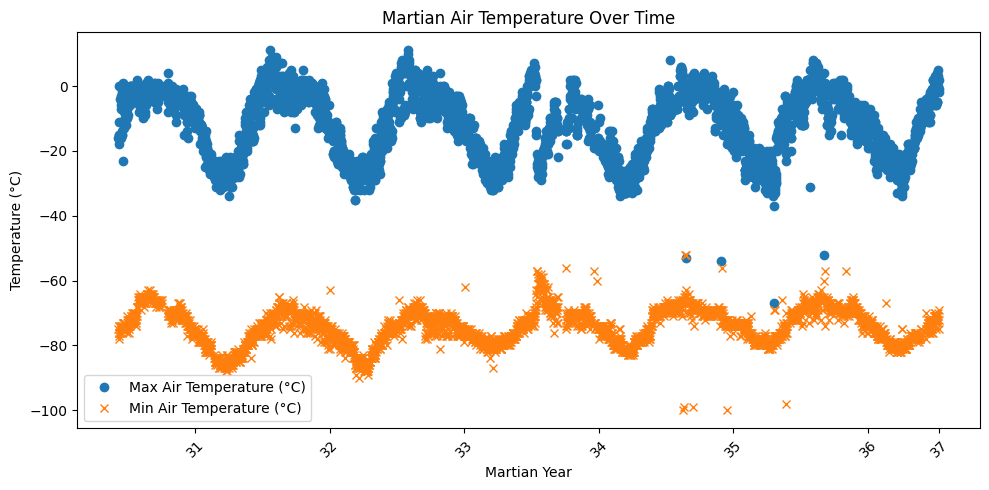

In [4]:


# convert 'martian_earth_date_proxy' to datetime
mars_weather_data['martian_earth_date_proxy'] = pd.to_datetime(mars_weather_data['martian_earth_date_proxy'])

# extracting year in YY format for labeling purposes
mars_weather_data['year'] = mars_weather_data['martian_earth_date_proxy'].dt.strftime('%y')


# find unique years for x-ticks
unique_years = mars_weather_data['year'].unique()

# plot
plt.figure(figsize=(10, 5))
plt.plot(mars_weather_data['martian_earth_date_proxy'], mars_weather_data['air_temperature_max_celsius'], label='Max Air Temperature (°C)', marker='o', linestyle='')
plt.plot(mars_weather_data['martian_earth_date_proxy'], mars_weather_data['air_temperature_min_celsius'], label='Min Air Temperature (°C)', marker='x', linestyle='')
plt.xlabel('Martian Year')
plt.ylabel('Temperature (°C)')
plt.title('Martian Air Temperature Over Time')
plt.legend()

# adjust labels
plt.xticks(mars_weather_data['martian_earth_date_proxy'][mars_weather_data['year'].drop_duplicates(keep='first').index], unique_years, rotation=45)

plt.tight_layout()

plt.savefig('../../docs_source/images/results/martian_air_temperature_over_time.png') 

plt.show()